# **1 Implement Logistic Regression Model Using Titanic Ship Dataset**

#Part 1 – Import the required Python, Pandas, Matplotlib, Seaborn packages




In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
a=pd.read_csv("/content/titanic_train.csv")
a.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Check basic info about the data set including missing value**

In [26]:
a.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
d=a.describe()
d

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
'''count=a['Survived'].count()
print('count : ',count)
mean=a['Survived'].mean()
print('mean : ',mean)'''
a.describe(percentiles=[0.25,0.50,0.75,1.00])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
100%,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
a.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

# Exploratory analysis and plots

Text(0.5, 1.0, 'Bar plot of the count of numeric features')

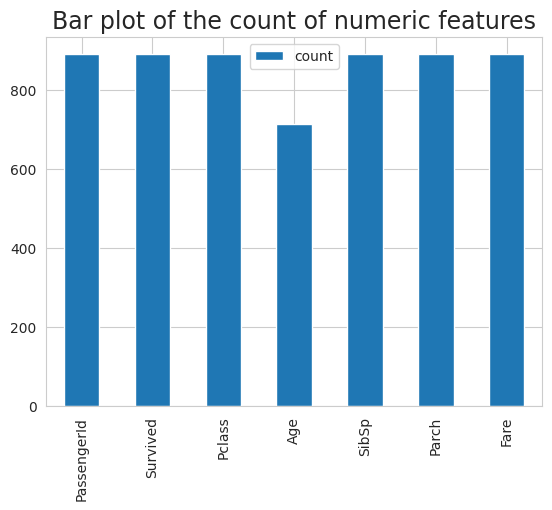

In [28]:
dT=d.T
dT.plot.bar(y='count')
plt.title("Bar plot of the count of numeric features",fontsize=17)

<ipython-input-15-95b987cd840d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=a,palette='RdBu_r')


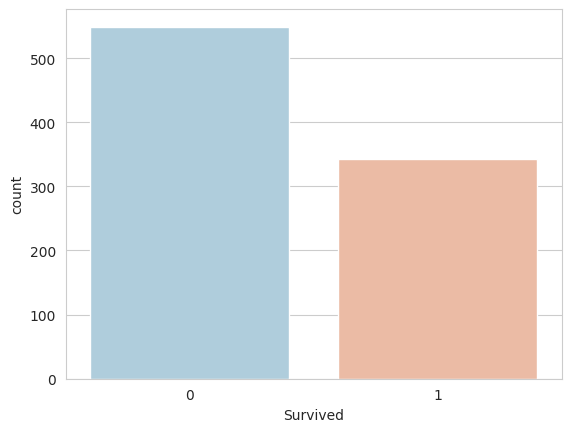

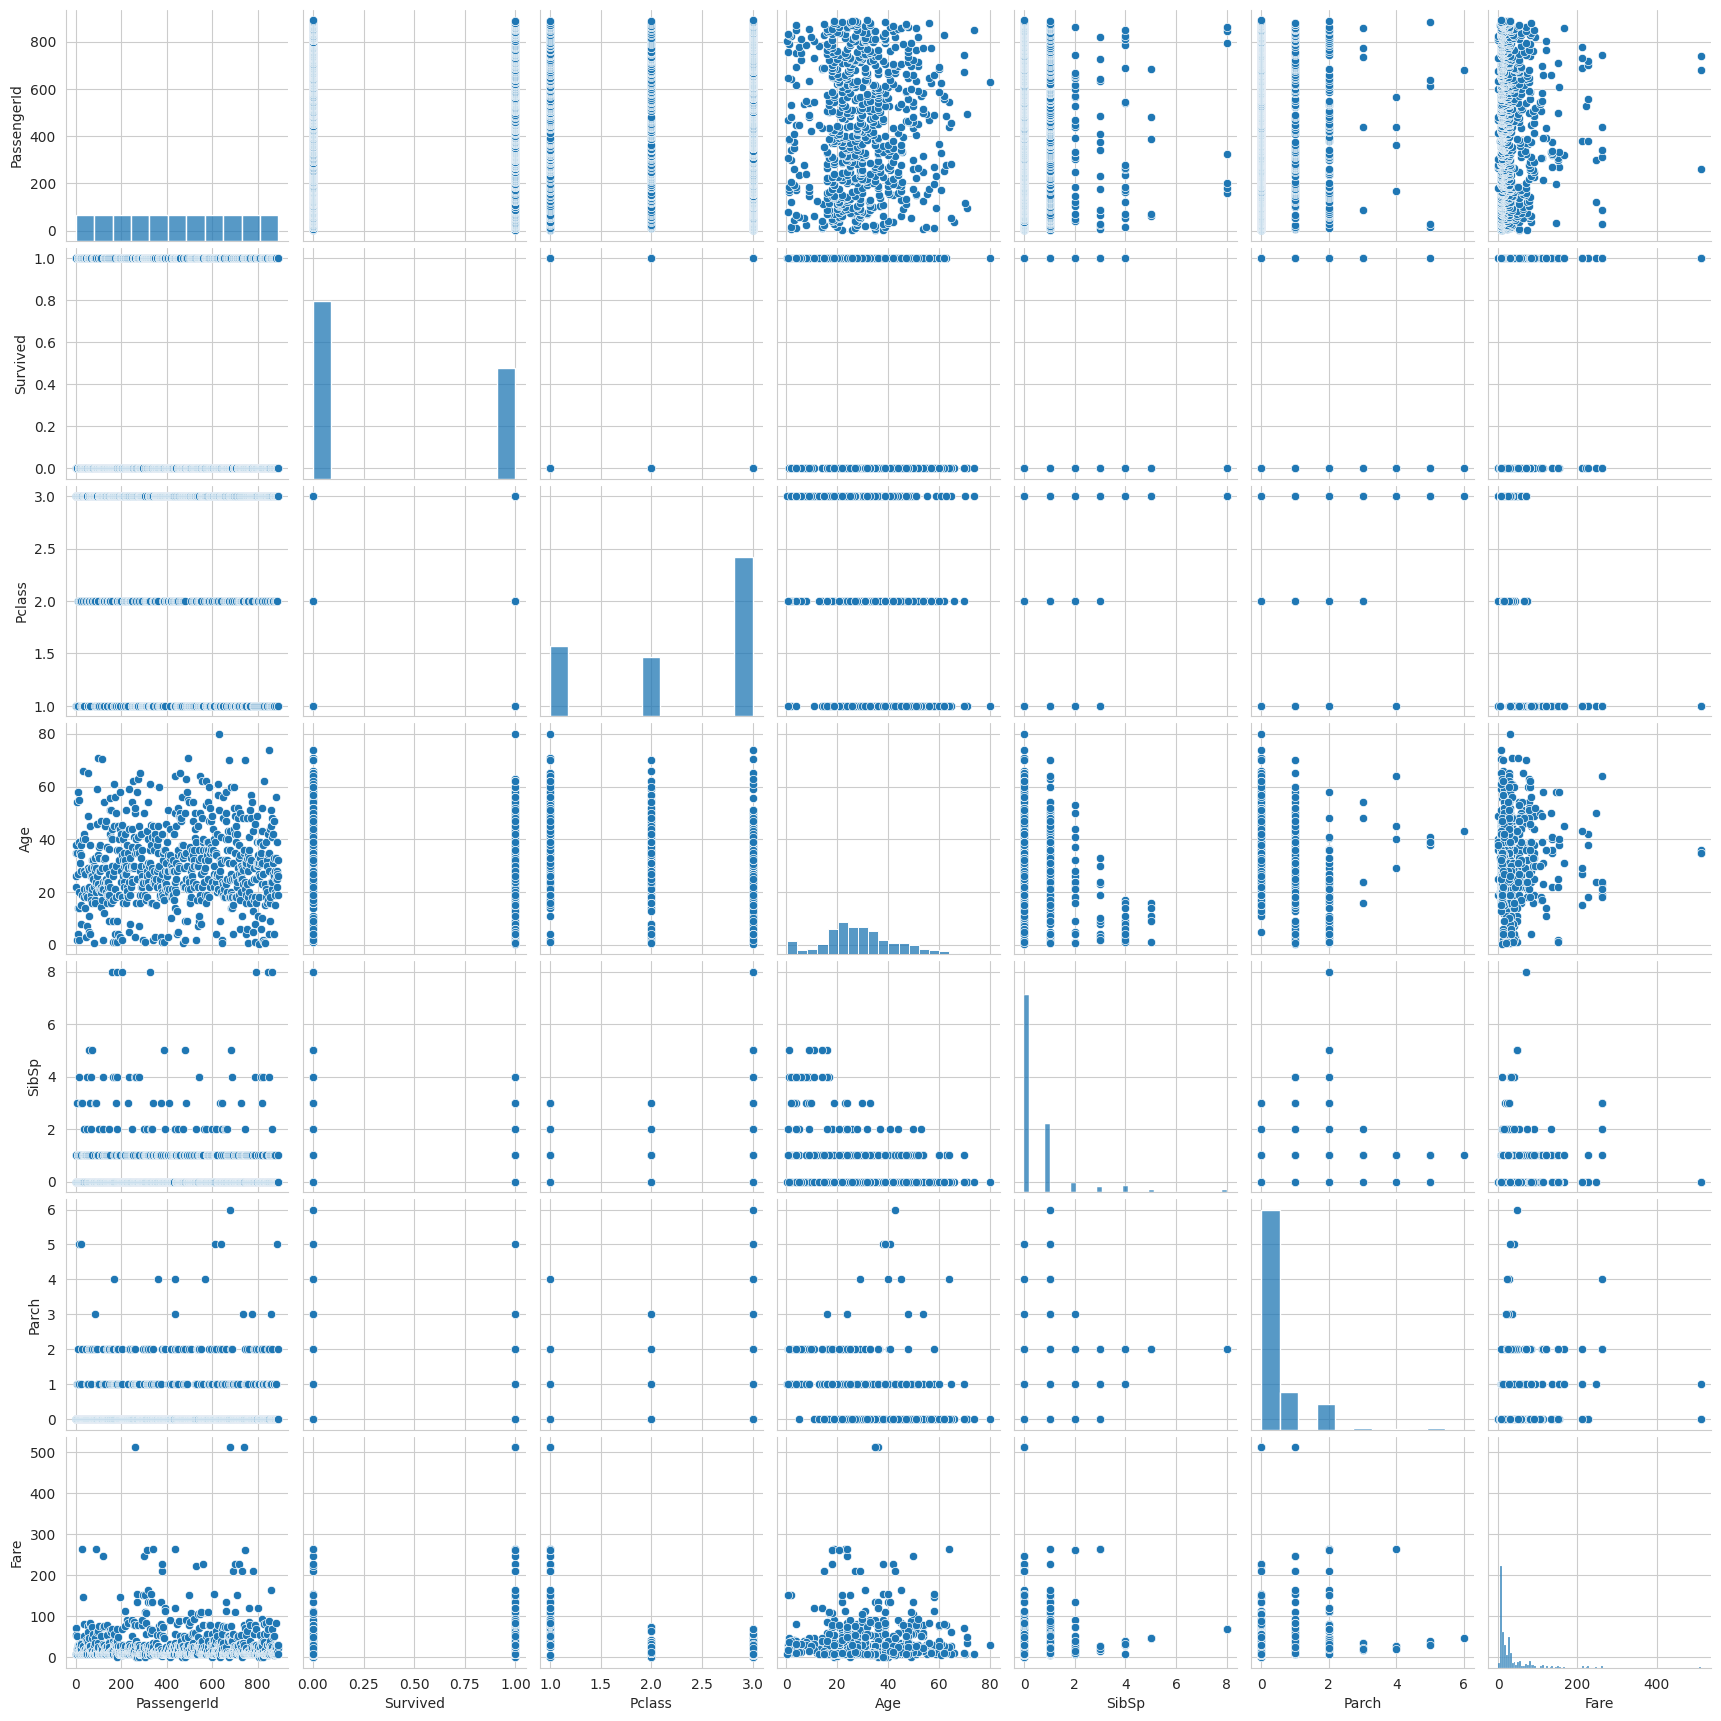

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=a,palette='RdBu_r')
sns.pairplot(a)

<Axes: xlabel='Survived', ylabel='count'>

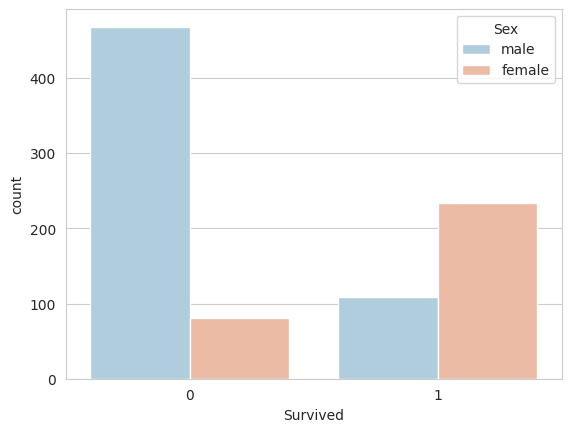

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=a,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

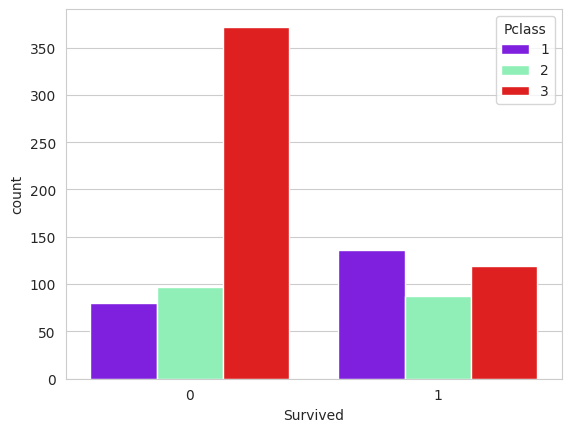

In [29]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=a,palette='rainbow')

<ipython-input-30-541e6a0f9564>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=f_class_survived,palette='rainbow')


Text(0.5, 1.0, 'Fraction of passengers survived by class : ')

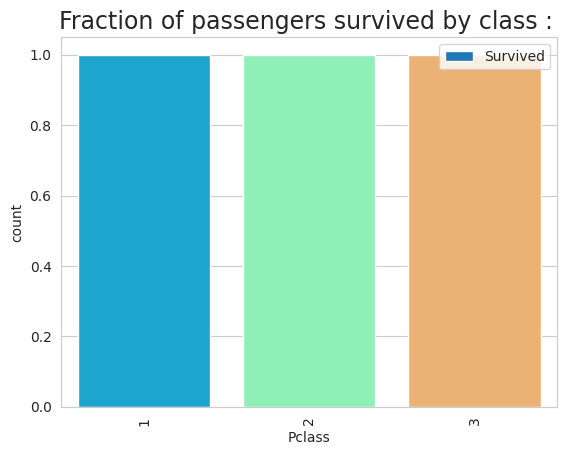

In [30]:
f_class_survived=a.groupby('Pclass')['Survived'].mean()
f_class_survived=pd.DataFrame(f_class_survived)
f_class_survived
f_class_survived.plot.bar(y='Survived')
sns.countplot(x='Survived',data=f_class_survived,palette='rainbow')
plt.title("Fraction of passengers survived by class : ",fontsize=17)

<Axes: xlabel='Survived', ylabel='count'>

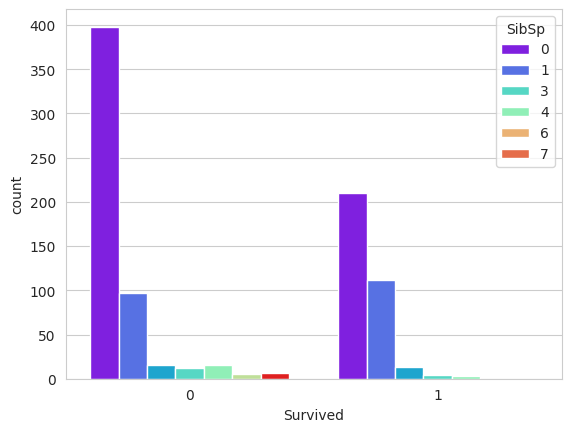

In [31]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='SibSp',data=a,palette='rainbow')

<Axes: title={'center': 'Age histogram of the passengers'}, xlabel='Age of the passengers', ylabel='Count'>

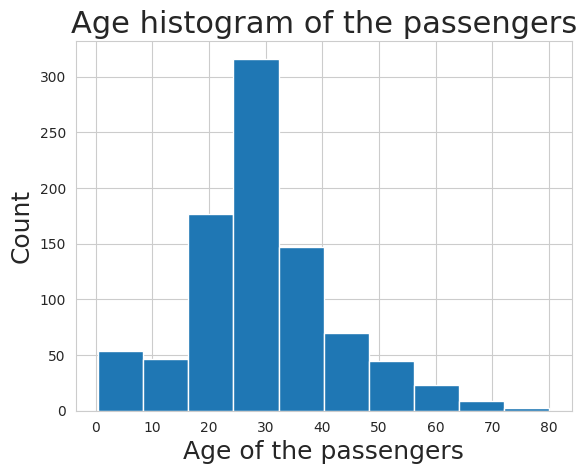

In [40]:
plt.xlabel("Age of the passengers",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.title("Age histogram of the passengers",fontsize=22)
#train['Age'].hist(bins=30,color='darkred',alpha=0.7,figsize=(10,6))
a['Age'].hist()

<ipython-input-32-d492782b883d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=a,palette='winter')


<Axes: xlabel='Passenger class', ylabel='age'>

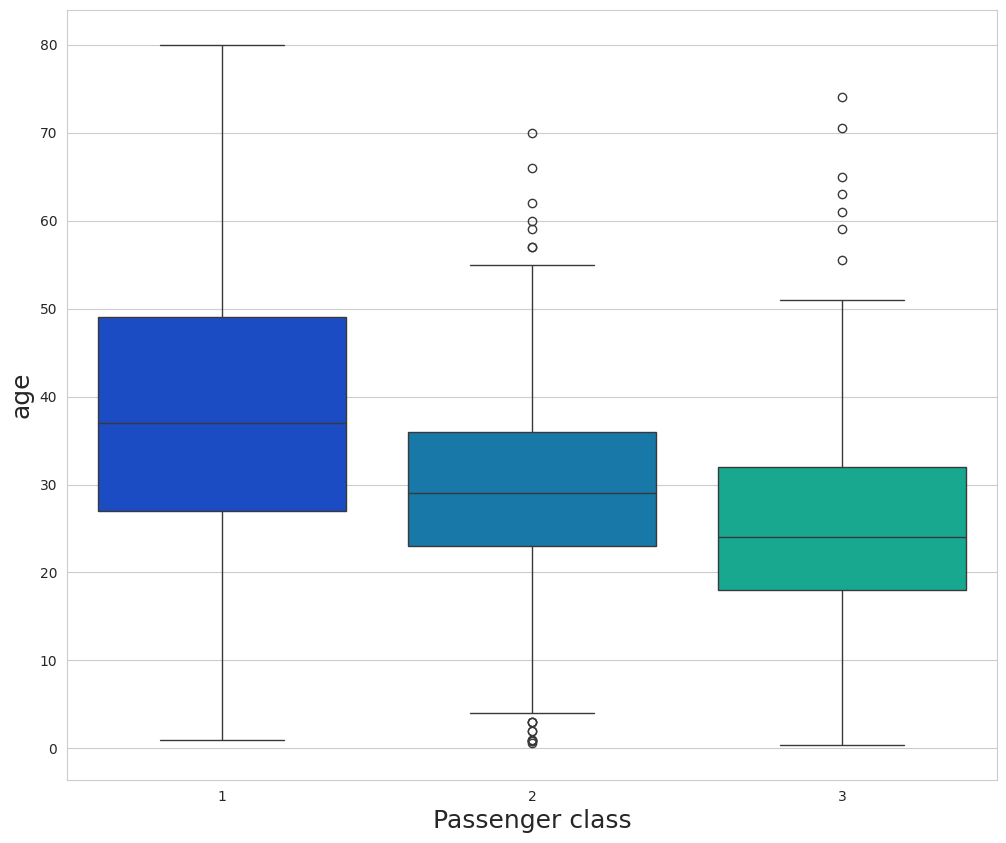

In [32]:
plt.figure(figsize=(12,10))
plt.xlabel("Passenger class",fontsize=18)
plt.ylabel("age",fontsize=18)
sns.boxplot(x='Pclass',y='Age',data=a,palette='winter')

Text(0, 0.5, 'Passengers class')

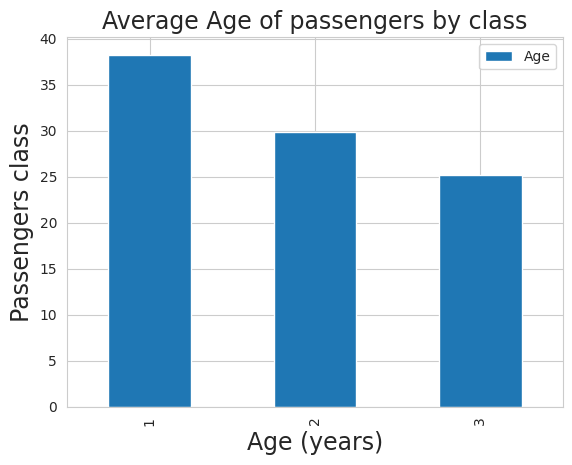

In [33]:
f_class_Age=a.groupby('Pclass')['Age'].mean()
f_class_Age=pd.DataFrame(f_class_Age)
f_class_Age.plot.bar(y='Age')
plt.title("Average Age of passengers by class",fontsize=17)
plt.xlabel("Age (years)",fontsize=17)
plt.ylabel("Passengers class",fontsize=17)

# Data wrangling (impute and drop)

In [34]:
b=list(f_class_Age['Age'])
def impute_age(cols):
  age=cols[0]
  pclass=cols[1]

  if pd.isnull(age):
    if pclass==1:
      return b[0]
    elif pclass==2:
      return b[1]
    else:
      return b[2]
  else:
    return age

Text(0.5, 1.0, 'Bar plot of the count of numeric features')

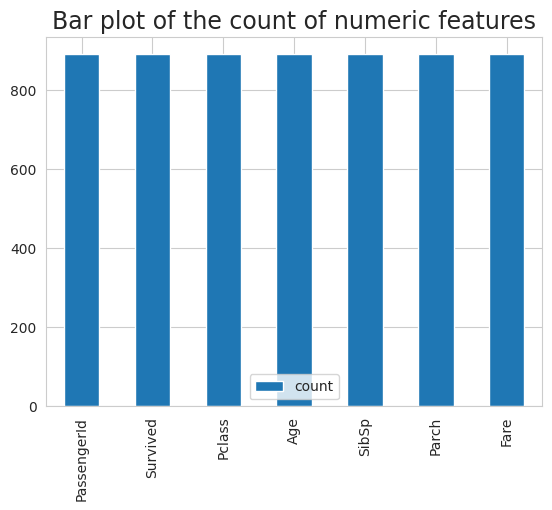

In [35]:
a['Age']=a[['Age','Pclass']].apply(impute_age,axis=1)
c=a.describe()
dt=c.T
dt.plot.bar(y='count')
plt.title("Bar plot of the count of numeric features",fontsize=17)

In [36]:
a.drop(['Cabin','PassengerId','Name','Ticket'],axis=1,inplace=True)
a.dropna(inplace=True)
a.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [37]:
sex=pd.get_dummies(a['Sex'],drop_first=True)
embark=pd.get_dummies(a['Embarked'],drop_first=True)

In [38]:
a.drop(['Sex','Embarked'],axis=1,inplace=True)
a=pd.concat([a,sex,embark],axis=1)

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(a.drop('Survived',axis=1),a['Survived'],)

# Logistic Regression model fit and prediction

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(a.drop('Survived',axis=1),a['Survived'], test_size=0.30,random_state=111)

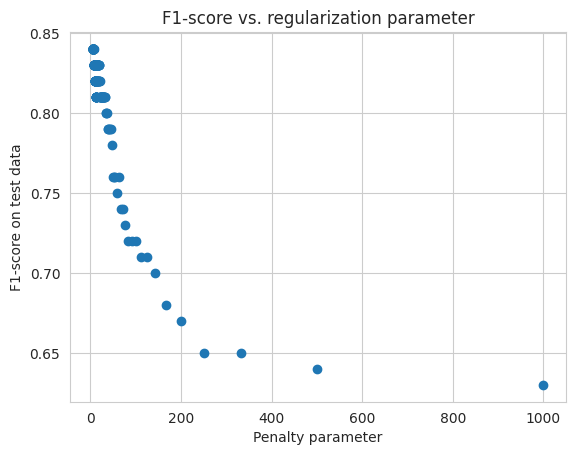

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

nsimu = 201
penalty = []
f1 = []

for i in range(1, nsimu):
    logmodel = LogisticRegression(C=i/1000, tol=1e-4, max_iter=int(1e6), n_jobs=-1)
    logmodel.fit(X_train, y_train)
    predictions = logmodel.predict(X_test)
    class_report = classification_report(y_test, predictions)
    l = class_report.split()
    f1_score = float(l[-2]) if len(l) > 2 else 0  # Extract F1-score from classification report
    f1.append(f1_score)
    penalty.append(1000/i)

plt.scatter(penalty, f1)
plt.title("F1-score vs. regularization parameter")
plt.xlabel("Penalty parameter")
plt.ylabel("F1-score on test data")
plt.show()

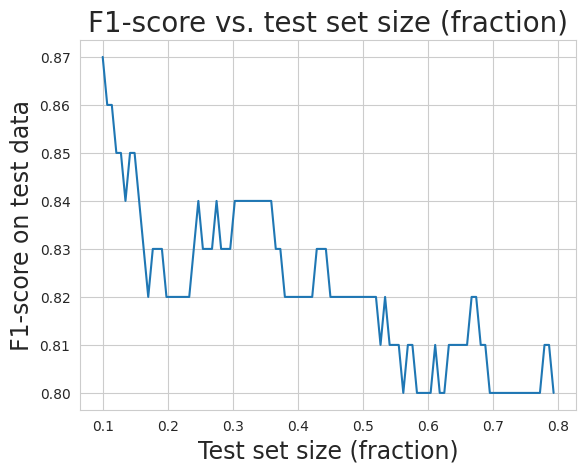

In [48]:
nsimu = 101
class_report = []
f1 = []
test_fraction = []

for i in range(1, nsimu):
    X_train, X_test, y_train, y_test = train_test_split(a.drop('Survived', axis=1), a['Survived'], test_size=0.1 + (i-1) * 0.007, random_state=111)
    logmodel = LogisticRegression(C=1, tol=1e-4, max_iter=1000, n_jobs=4)
    logmodel.fit(X_train, y_train)
    predictions = logmodel.predict(X_test)
    report = classification_report(y_test, predictions)
    class_report.append(report)
    l = report.split()
    f1_score = float(l[-2]) if len(l) > 2 else 0
    f1.append(f1_score)
    test_fraction.append(0.1 + (i-1) * 0.007)

plt.plot(test_fraction, f1)
plt.title("F1-score vs. test set size (fraction)", fontsize=20)
plt.xlabel("Test set size (fraction)", fontsize=17)
plt.ylabel("F1-score on test data", fontsize=17)
plt.show()

In [54]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Handle missing values
imputer = SimpleImputer(strategy='mean')
a_imputed = pd.DataFrame(imputer.fit_transform(a.drop('Survived', axis=1)), columns=a.drop('Survived', axis=1).columns)

# Ensure 'Sex' and 'Embarked' columns exist in DataFrame 'a'
if 'Sex' in a.columns and 'Embarked' in a.columns:
    # Encode categorical variables
    sex_embarked = pd.get_dummies(a[['Sex', 'Embarked']], drop_first=True)

    # Combine numerical and encoded categorical variables
    a_processed = pd.concat([a_imputed, sex_embarked], axis=1)

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(a_processed, a['Survived'], test_size=0.3, random_state=111)

    # Train logistic regression model
    logmodel = LogisticRegression(C=1, tol=1e-5, max_iter=1000, n_jobs=4)
    logmodel.fit(X_train, y_train)

    # Evaluate model
    predictions = logmodel.predict(X_test)
    report = classification_report(y_test, predictions)